In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('notebook')
RANDOM_SEED = 20090425

Reading the Pima Indians Diabetes Database to predict diabetes. Click __[here](https://www.kaggle.com/uciml/pima-indians-diabetes-database)__ to get data.

In [2]:
data = pd.read_csv("../../data/diabetes.csv")
glucose = pd.DataFrame(data.Glucose)
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
data.mean()

Pregnancies                   3.845052
Glucose                     120.894531
BloodPressure                69.105469
SkinThickness                20.536458
Insulin                      79.799479
BMI                          31.992578
DiabetesPedigreeFunction      0.471876
Age                          33.240885
Outcome                       0.348958
dtype: float64

Using MLE and MOM

In [5]:
data.columns = [x.replace(' ','_') for x in data.columns]
data.columns = [x.replace(':','_') for x in data.columns]
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

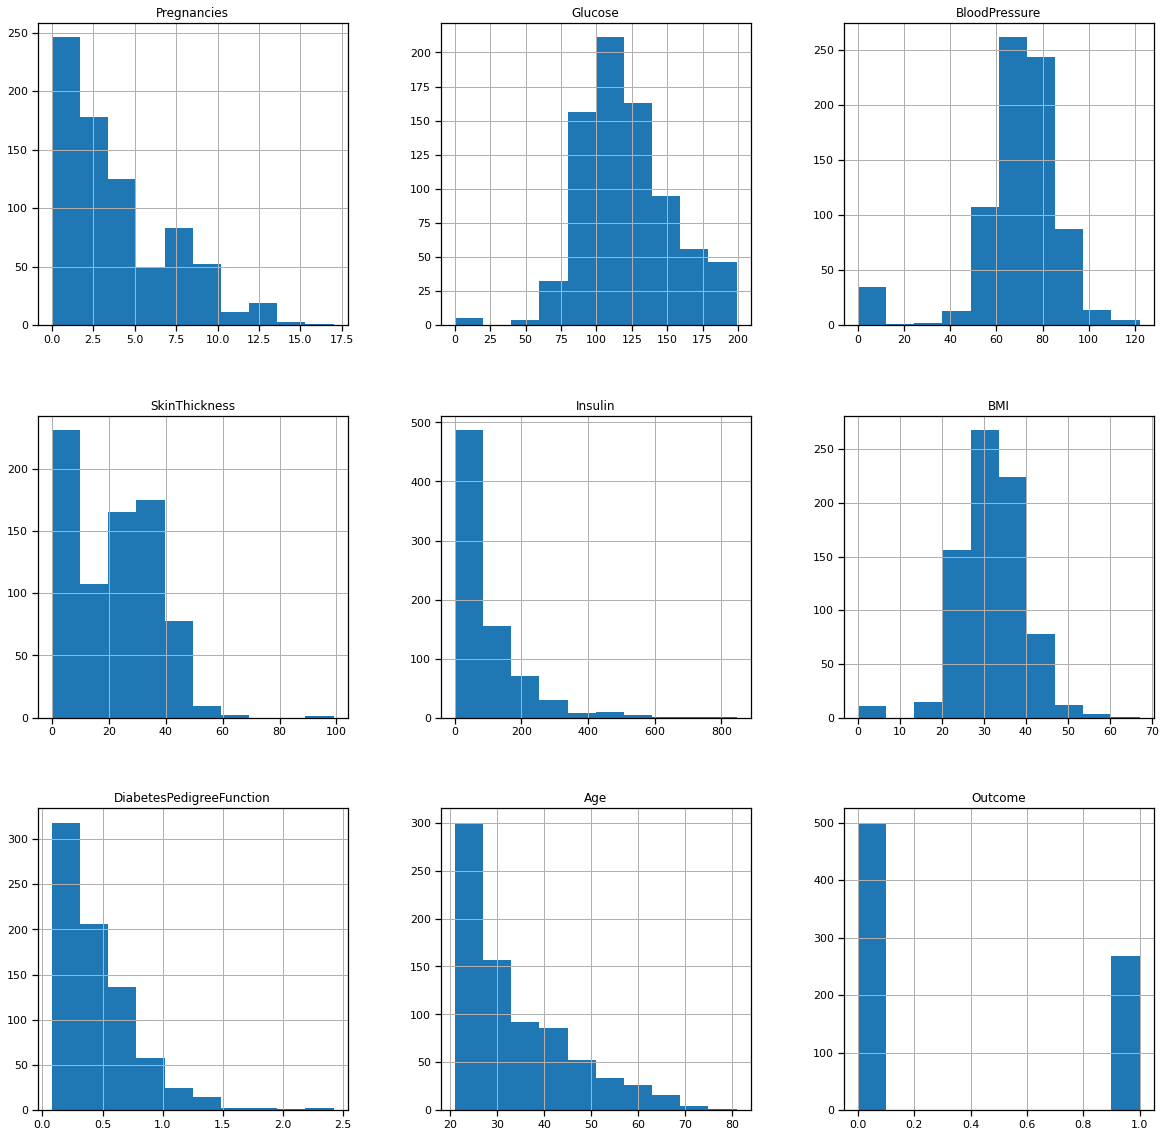

In [6]:
hist = data.hist(bins=10,figsize=(20,20))

In [7]:
MLE_mean = data.mean()
MLE_var = data.var()
sd = MLE_var**0.5
MLE_mean, MLE_var, sd

(Pregnancies                   3.845052
 Glucose                     120.894531
 BloodPressure                69.105469
 SkinThickness                20.536458
 Insulin                      79.799479
 BMI                          31.992578
 DiabetesPedigreeFunction      0.471876
 Age                          33.240885
 Outcome                       0.348958
 dtype: float64,
 Pregnancies                    11.354056
 Glucose                      1022.248314
 BloodPressure                 374.647271
 SkinThickness                 254.473245
 Insulin                     13281.180078
 BMI                            62.159984
 DiabetesPedigreeFunction        0.109779
 Age                           138.303046
 Outcome                         0.227483
 dtype: float64,
 Pregnancies                   3.369578
 Glucose                      31.972618
 BloodPressure                19.355807
 SkinThickness                15.952218
 Insulin                     115.244002
 BMI                        

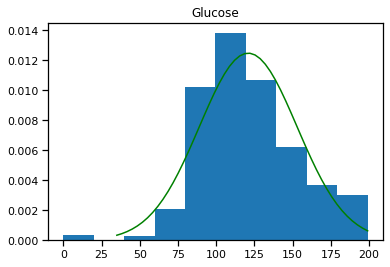

In [8]:
from scipy.stats.distributions import norm
glucose.hist(density = True, bins = 10, grid = False)
x = np.linspace(35, glucose.max())
plt.plot(x, norm.pdf(x, MLE_mean[1], sd[1]), 'g-')

In [9]:
sd[1]

31.97261819513622

In [10]:
from pymc3 import Model, Uniform, Normal
with Model() as glucose_Model:
    μ = Normal('μ', mu=120, sd=32)
    σ = Uniform('σ', 0, 32)

WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [11]:
with glucose_Model:
    y = Normal('y', mu = μ, sd = σ, observed = glucose)

In [12]:
from pymc3 import fit

with glucose_Model:
    samples = fit(random_seed=RANDOM_SEED).sample(1000)

Finished [100%]: Average Loss = 3,764


Got error No model on context stack. trying to find log_likelihood in translation.
D:\anaconda3\lib\site-packages\arviz\data\io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


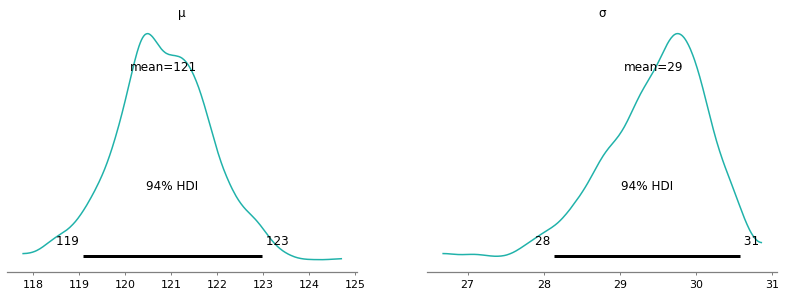

In [13]:
from arviz import plot_posterior
plot_posterior(samples[100:], 
               var_names=['μ','σ'],  
               color='LightSeaGreen');

D:\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Glucose'}, ylabel='Density'>

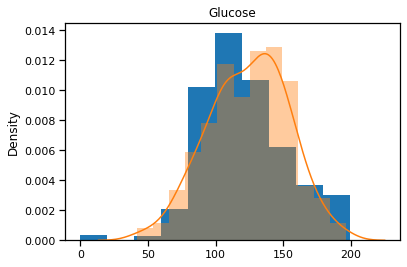

In [14]:
glucose.hist(density = True, bins = 10, grid = False)
n = Normal.dist(121,29).random(size=300)
sns.distplot(n)

I think Pymc3 method of computing the parameters is more fun, because of its simplicity in comparison to MLE which involve more math.